In [27]:
library(ggplot2)

library(tidyverse)

In [28]:
data = read.csv('ames_housing.csv')
print(head(data))

   Id       PID MS.SubClass MS.Zoning Lot.Frontage Lot.Area Street Alley
1 109 533352170          60        RL           NA    13517   Pave      
2 544 531379050          60        RL           43    11492   Pave      
3 153 535304180          20        RL           68     7922   Pave      
4 318 916386060          60        RL           73     9802   Pave      
5 255 906425045          50        RL           82    14235   Pave      
6 138 535126040          20        RL          137    16492   Pave      
  Lot.Shape Land.Contour Utilities Lot.Config Land.Slope Neighborhood
1       IR1          Lvl    AllPub    CulDSac        Gtl       Sawyer
2       IR1          Lvl    AllPub    CulDSac        Gtl      SawyerW
3       Reg          Lvl    AllPub     Inside        Gtl        NAmes
4       Reg          Lvl    AllPub     Inside        Gtl       Timber
5       IR1          Lvl    AllPub     Inside        Gtl      SawyerW
6       IR1          Lvl    AllPub     Corner        Gtl        NAmes

In [29]:
tail(data)

,Id,PID,MS.SubClass,MS.Zoning,Lot.Frontage,Lot.Area,Street,Alley,Lot.Shape,Land.Contour,...,Screen.Porch,Pool.Area,Pool.QC,Fence,Misc.Feature,Misc.Val,Mo.Sold,Yr.Sold,Sale.Type,SalePrice
,<int>,<int>,<int>,<chr>,<dbl>,<int>,<chr>,<chr>,<chr>,<chr>,...,<int>,<int>,<chr>,<chr>,<chr>,<int>,<int>,<int>,<chr>,<int>
2046,1051,528102030,20,RL,96,12444,Pave,,Reg,Lvl,...,0,0,,,,0,11,2008,New,394617
2047,1587,921126030,20,RL,79,11449,Pave,,IR1,HLS,...,0,0,,,,0,1,2008,WD,298751
2048,785,905377130,30,RL,NA,12342,Pave,,IR1,Lvl,...,0,0,,,,0,3,2009,WD,82500
2049,916,909253010,50,RL,57,7558,Pave,,Reg,Bnk,...,0,0,,,,0,3,2009,WD,177000
2050,639,535179160,20,RL,80,10400,Pave,,Reg,Lvl,...,0,0,,,,0,11,2009,WD,144000
2051,10,527162130,60,RL,60,7500,Pave,,Reg,Lvl,...,0,0,,,,0,6,2010,WD,189000


In [30]:
str(data)

'data.frame':	2051 obs. of  81 variables:
 $ Id             : int  109 544 153 318 255 138 2827 145 1942 1956 ...
 $ PID            : int  533352170 531379050 535304180 916386060 906425045 535126040 908186070 535154050 535353130 535426130 ...
 $ MS.SubClass    : int  60 60 20 60 50 20 180 20 20 60 ...
 $ MS.Zoning      : chr  "RL" "RL" "RL" "RL" ...
 $ Lot.Frontage   : num  NA 43 68 73 82 137 35 NA NA 70 ...
 $ Lot.Area       : int  13517 11492 7922 9802 14235 16492 3675 12160 15783 11606 ...
 $ Street         : chr  "Pave" "Pave" "Pave" "Pave" ...
 $ Alley          : chr  "" "" "" "" ...
 $ Lot.Shape      : chr  "IR1" "IR1" "Reg" "Reg" ...
 $ Land.Contour   : chr  "Lvl" "Lvl" "Lvl" "Lvl" ...
 $ Utilities      : chr  "AllPub" "AllPub" "AllPub" "AllPub" ...
 $ Lot.Config     : chr  "CulDSac" "CulDSac" "Inside" "Inside" ...
 $ Land.Slope     : chr  "Gtl" "Gtl" "Gtl" "Gtl" ...
 $ Neighborhood   : chr  "Sawyer" "SawyerW" "NAmes" "Timber" ...
 $ Condition.1    : chr  "RRAe" "Norm" "Norm" "N

In [31]:
summary(data)

       Id              PID             MS.SubClass      MS.Zoning        
 Min.   :   1.0   Min.   :526301100   Min.   : 20.00   Length:2051       
 1st Qu.: 753.5   1st Qu.:528458140   1st Qu.: 20.00   Class :character  
 Median :1486.0   Median :535453200   Median : 50.00   Mode  :character  
 Mean   :1474.0   Mean   :713590006   Mean   : 57.01                     
 3rd Qu.:2198.0   3rd Qu.:907180080   3rd Qu.: 70.00                     
 Max.   :2930.0   Max.   :924152030   Max.   :190.00                     
                                                                         
  Lot.Frontage       Lot.Area         Street             Alley          
 Min.   : 21.00   Min.   :  1300   Length:2051        Length:2051       
 1st Qu.: 58.00   1st Qu.:  7500   Class :character   Class :character  
 Median : 68.00   Median :  9430   Mode  :character   Mode  :character  
 Mean   : 69.06   Mean   : 10065                                        
 3rd Qu.: 80.00   3rd Qu.: 11514           

In [32]:
print(paste('No. Rows:',nrow(data)))
print(paste('No. Cols:',ncol(data)))

[1] "No. Rows: 2051"
[1] "No. Cols: 81"


In [33]:
group_garage_type = group_by(data, Garage.Type)
summary = summarize(group_garage_type,
                   count=n())
summary

`summarise()` ungrouping output (override with `.groups` argument)



Garage.Type,count
<chr>,<int>
,113
2Types,19
Attchd,1213
Basment,27
BuiltIn,132
CarPort,11
Detchd,536


In [34]:
data$Garage.Qual = NULL
data$Garage.Cond = NULL
data$Pool.QC = NULL
data$Fence = NULL
data$Misc.Feature = NULL

In [35]:
group = group_by(data, Gr.Liv.Area)

In [39]:
group_Electrical = group_by(data, Electrical)
group_Heating = group_by(data, Heating)

In [46]:
summary_Gr.Liv.Area_by_Electrical = summarize(group_Electrical, 
                              min.Gr.Liv.Area = min(Gr.Liv.Area),
                              max.Gr.Liv.Area = max(Gr.Liv.Area))
summary_Gr.Liv.Area_by_Electrical

`summarise()` ungrouping output (override with `.groups` argument)



Electrical,min.Gr.Liv.Area,max.Gr.Liv.Area
<chr>,<int>,<int>
FuseA,480,3395
FuseF,334,2256
FuseP,572,2350
Mix,1077,1077
SBrkr,492,5642


In [48]:
summary_Gr.Liv.Area_by_Heating = summarize(group_Heating, 
                              min.Gr.Liv.Area = min(Gr.Liv.Area),
                              max.Gr.Liv.Area = max(Gr.Liv.Area))
summary_Gr.Liv.Area_by_Heating

`summarise()` ungrouping output (override with `.groups` argument)



Heating,min.Gr.Liv.Area,max.Gr.Liv.Area
<chr>,<int>,<int>
GasA,334,5642
GasW,950,2792
Grav,693,2256
OthW,2058,2358
Wall,733,1529


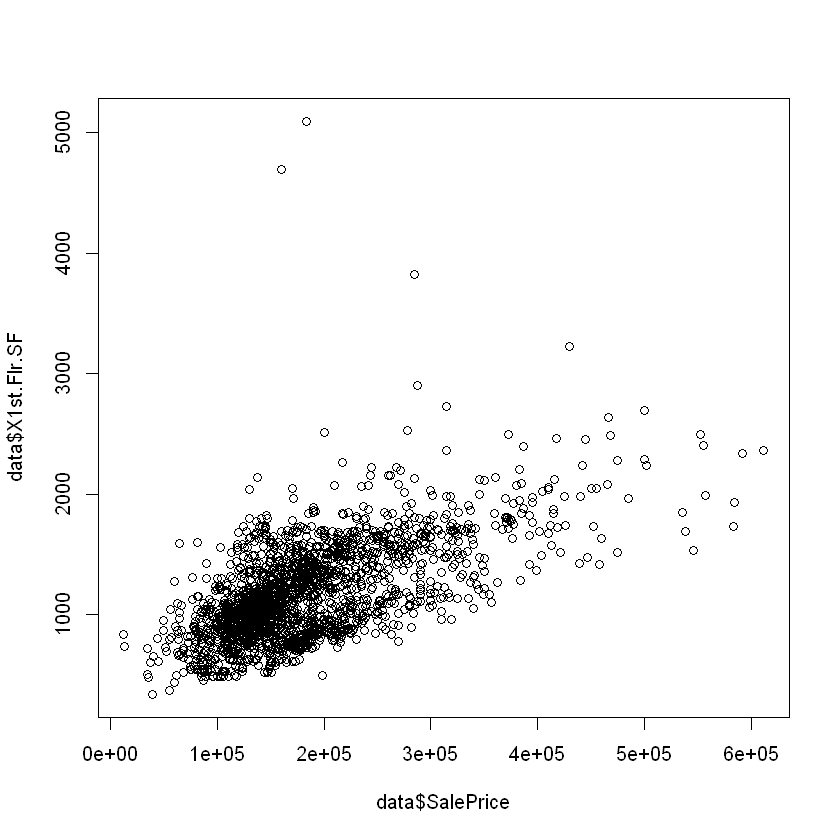

In [40]:
plot(x = data$SalePrice, y = data$X1st.Flr.SF)

## Analysis:
- 

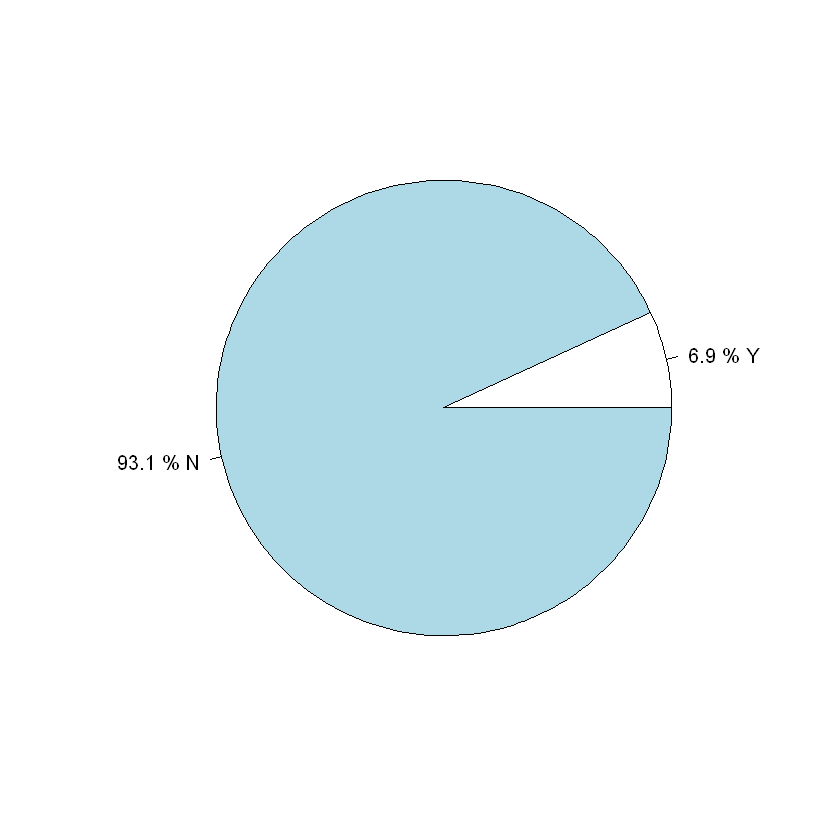

In [64]:
piepercent = round(100*table(data$Central.Air)/sum(table(data$Central.Air)),1)
labels = c('Y','N')
pie(table(data$Central.Air),labels = paste(piepercent,'%',labels))